In [36]:
#Libraries for handaling dataframes
import numpy as np
import pandas as pd

#Libraries for parameter optimization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

#Importing necessary libraries to prevent crashes with temporary files 
from tempfile import mkdtemp

#Libraries for modeling
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Libraries for scoring models
from sklearn.metrics import make_scorer, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

# Advanced modeling

In this notebook, leveraging the insights from previous analyses, we will search for the optimal intrusion detection model using sklearn Pipeline and GridSearchCV. Our focus will be on achieving the highest recall score possible. Please note that the runtime for this notebook is expected to be lengthy due to the extensive model exploration and hyperparameter tuning.

In [4]:
#Import train dataset
train_df = pd.read_csv('processed/Train.csv')

#Separate target variable
X = train_df.drop(columns='Class')
y = train_df['Class']

#Create a validation set for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=0)

I chose Logistic Regression, Decision Tree Classifier, and K-Nearest Neighbors Classifier as our models for Intrusion Detection System (IDS) for several reasons:

1. Logistic Regression: It is a straightforward and interpretable classification algorithm. Its linear nature makes it computationally efficient, which is advantageous when working with large datasets like ours. Moreover, it can handle both binary and multiclass classification tasks, making it suitable for detecting malicious and benign connections.

2. Decision Tree Classifier: Decision trees are powerful and easy-to-interpret models that can handle both numerical and categorical data. They are well-suited for capturing non-linear relationships in the data, making them effective in distinguishing between different types of connections in our IDS.

3. K-Nearest Neighbors Classifier: This model is a simple and effective non-parametric algorithm that classifies data points based on their proximity to other data points in the feature space. It works well for both binary and multiclass classification and can be effective when there are distinct clusters of data representing different types of connections.

Additionally, I considered using Support Vector Machines (SVM) for IDS modeling, but I omitted them due to the limitations of my machine. SVMs can be computationally intensive, especially when dealing with large datasets. Given the dataset size and my machine's constraints, I decided to focus on the aforementioned models, which are still capable of delivering valuable results while being computationally manageable.

In [38]:
#Creating the pipeline and param_grid to search for the best ML model
estimators = [('scaler', StandardScaler()),
              ('model', LogisticRegression())]

# Creating a temporary cache directory for the pipeline to store intermediate results.
cachedir = mkdtemp(dir='temp/')

# Creating the pipeline object with the specified estimators and memory caching.
pipe = Pipeline(estimators, memory=cachedir)

# Defining the parameter grid to search for the best model using GridSearchCV.
param_grid = [{'model':[LogisticRegression()],
               'scaler':[StandardScaler(),RobustScaler()],
               'model__max_iter':[1000],
               'model__penalty':['l2'],
               'model__C':[0.1,1,10,100],
               'model__solver':['lbfgs']},
             {'model':[DecisionTreeClassifier()],
              'scaler':[StandardScaler(),None],
              'model__max_depth':[3,5,7,9]},
             {'model':[KNeighborsClassifier()],
              'scaler':[StandardScaler(),RobustScaler()],
              'model__n_neighbors':[2,5,10]}]

# Using 'recall_score' as the evaluation metric for the model selection during cross-validation.
scorer = make_scorer(recall_score)

In [42]:
# Initializing the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid,scoring = scorer, cv=3,n_jobs=-1,verbose=1)

In [43]:
# Ignoring warnings for the duration of grid_search.fit() execution
with warnings.catch_warnings():
    warnings.simplefilter("ignore",category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=UserWarning)

    # Fitting the GridSearchCV object to find the best model and hyperparameters.
    grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 22 candidates, totalling 66 fits


/home/mdsv9/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mdsv9/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/mdsv9/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mdsv9/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [44]:
grid_search.best_params_

{'model': KNeighborsClassifier(),
 'model__n_neighbors': 5,
 'scaler': StandardScaler()}

After approximately 30 minutes, our GridSearch returned the best hyperparameters for the KNeighboursClassifier, with n_neighbors = 5 and a StandardScaler, which provided the highest recall score compared to all other searches. With this valuable information, we can now proceed to evaluate the performance of this hyperoptimized model.

In [47]:
grid_search.best_estimator_

Pipeline(memory='temp/tmpi4sz8ryg',
         steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

[CV] END model=LogisticRegression(), model__C=0.1, model__max_iter=1000, model__penalty=l2, model__solver=lbfgs, scaler=RobustScaler(); total time= 2.0min
[CV] END model=LogisticRegression(), model__C=10, model__max_iter=1000, model__penalty=l2, model__solver=lbfgs, scaler=RobustScaler(); total time= 1.9min
[CV] END model=DecisionTreeClassifier(), model__max_depth=3, scaler=StandardScaler(); total time=   7.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=3, scaler=StandardScaler(); total time=   7.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=3, scaler=None; total time=   6.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=3, scaler=None; total time=   6.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, scaler=StandardScaler(); total time=  10.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, scaler=None; total time=   9.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, scaler=None; total time=  12.7s
[CV]

In [25]:
final_pipe = grid_search.best_estimator_

final_pipe.fit(X_train,y_train)

Pipeline(memory='temp/tmpd_4ov19g',
         steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [48]:
train_score = final_pipe.score(X_train,y_train)
val_score = final_pipe.score(X_val,y_val)

print(f'Training score: {round(train_score,4)}\nValidation score: {round(val_score,4)}')

Training score: 0.9993
Validation score: 0.9992


While the accuracy score is impressive, it alone doesn't give us the complete picture for an Intrusion Detection System (IDS). In this context, high recall is essential to ensure that we detect as many malicious connections as possible, even if it means having more false positives.

By utilizing the recall_score as the metric to find the best parameters from the GridSearch, we prioritized the ability of the model to correctly identify MALIGNANT connections. Now, let's assess the performance of our final pipeline on this crucial metric to determine how well it truly fares in detecting intrusions.

In [49]:
y_pred = final_pipe.predict(X_val)
result = classification_report(y_val,y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    130993
           1       1.00      1.00      1.00    130503

    accuracy                           1.00    261496
   macro avg       1.00      1.00      1.00    261496
weighted avg       1.00      1.00      1.00    261496



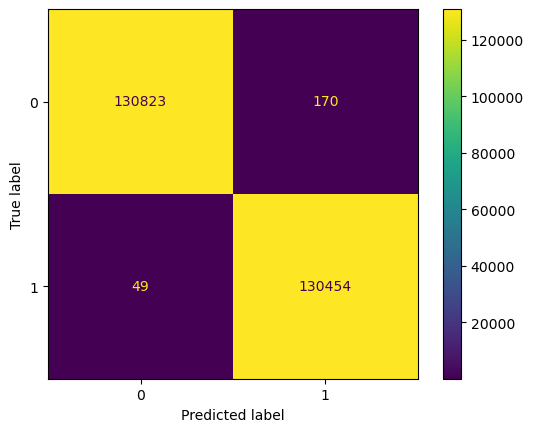

In [32]:
ConfusionMatrixDisplay.from_estimator(final_pipe, X_val, y_val);

Out of **261,496** connections in our validation set, our model is only mislabeling **49** of them. This indicates that our model is highly accurate in correctly identifying `MALICIOUS` connections. However, to ensure its robustness in real-world scenarios, which often involve imbalanced data, we must evaluate its performance on the test set that replicates such imbalances. 

Let's proceed to score the recall on the test set to get a more accurate representation of our model's performance under real-world conditions.

In [28]:
#Importing our test set and splitting its components
test_df = pd.read_csv('processed/Test.csv')

X_test = test_df.drop(columns='Class')
y_test = test_df['Class']

In [30]:
y_pred = final_pipe.predict(X_test)
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    475825
           1       1.00      1.00      1.00    140087

    accuracy                           1.00    615912
   macro avg       1.00      1.00      1.00    615912
weighted avg       1.00      1.00      1.00    615912



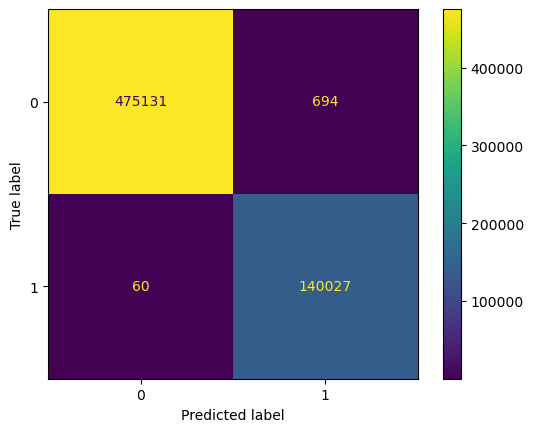

In [33]:
ConfusionMatrixDisplay.from_estimator(final_pipe, X_test, y_test);

In [52]:
test_score = final_pipe.score(X_test,y_test)

print(f'Training score: {round(train_score,4)}\nValidation score: {round(val_score,4)}\nTest score:{round(test_score,4)}')

Training score: 0.9993
Validation score: 0.9992
Test score:0.9988


Out of **615,912** connections in our test set, our model is only mislabeling **60** of them. The comparable level of recall on the test set compared to the training set indicates that our model is not overfitted and has indeed learned underlying patterns that enable it to correctly label `MALICIOUS` connections. This gives us confidence in the generalizability of our model and its effectiveness in real-world scenarios.